# ***ITEM DEMAND FORCASTING FOR 3 MONTHS.***

 # ***AIM:***
     
*  # *This model was analysing the 5 years of sales of 50+ items in 10+ different shops at every day .It will be find the demand of next three months of items .*


1.  *data cleaning.*
2.  *EDA for dataset.*
3.  *splitting of data*
4.  *scaling of the data*
5.  *build the model* 

 *   linear regression algorithm
 *   KNN regressor algorithm
 *   Decision tree regressor algorithm
 *   Random forest regressor algorithm
 *   Xgboost algorithm
 *   voting regressor algorithm

6.  *evaluate the all models*

 








# **1. Data Cleaning**

In [114]:
# import all neccessary libraries for data reading, cleaning and EDA
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [115]:
df=pd.read_csv('train 2.csv')               # read the dataset
print('Shape of Raw dataset :', df.shape)   # shape of dataframe before dropping duplicates

Shape of Raw dataset : (913000, 4)


In [116]:
df=df.drop_duplicates()
print('Shape of  Dataframe after remove duplicates :',df.shape)

Shape of  Dataframe after remove duplicates : (913000, 4)


**NO Duplicates are presents in the dataset**

In [117]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [118]:
df.info()                              # check the datatypes are in right format

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 34.8+ MB


 **Datatype of date column is not meaningful.So it will change into "datetime" datatype.**

In [119]:
df['date']=pd.to_datetime(df['date']) # change the datatype of date column
df=df.sort_values(by=['date','item']) # dataset is changing into ascending order with respect to date
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1826,2013-01-01,2,1,12
3652,2013-01-01,3,1,19
5478,2013-01-01,4,1,10
7304,2013-01-01,5,1,11


In [120]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [121]:
#df=df.drop('store',axis=1)

In [122]:
df=pd.DataFrame(df.groupby(['date','item'])['sales'].sum())
df.reset_index(inplace=True)
df

,date,item,sales
0,2013-01-01,1,133
1,2013-01-01,2,327
2,2013-01-01,3,172
3,2013-01-01,4,102
4,2013-01-01,5,83
...,...,...,...
91295,2017-12-31,46,605
91296,2017-12-31,47,211
91297,2017-12-31,48,494
91298,2017-12-31,49,285


In [123]:
df['end_date']=df['date']+pd.DateOffset(months=+3)

In [124]:
df['duration']=(df['end_date']-df['date']).dt.days
df

,date,item,sales,end_date,duration
0,2013-01-01,1,133,2013-04-01,90
1,2013-01-01,2,327,2013-04-01,90
2,2013-01-01,3,172,2013-04-01,90
3,2013-01-01,4,102,2013-04-01,90
4,2013-01-01,5,83,2013-04-01,90
...,...,...,...,...,...
91295,2017-12-31,46,605,2018-03-31,90
91296,2017-12-31,47,211,2018-03-31,90
91297,2017-12-31,48,494,2018-03-31,90
91298,2017-12-31,49,285,2018-03-31,90


In [125]:
items_df=[]                                     # A whole dataframe split into multiple dataframe with respect to items
for i in range(1,51):
  items_df.append(df.loc[df['item']==i])
items_df[1]                                     # Every item have unique dataframe
  

,date,item,sales,end_date,duration
1,2013-01-01,2,327,2013-04-01,90
51,2013-01-02,2,279,2013-04-02,90
101,2013-01-03,2,304,2013-04-03,90
151,2013-01-04,2,359,2013-04-04,90
201,2013-01-05,2,377,2013-04-05,90
...,...,...,...,...,...
91051,2017-12-27,2,500,2018-03-27,90
91101,2017-12-28,2,495,2018-03-28,90
91151,2017-12-29,2,515,2018-03-29,90
91201,2017-12-30,2,538,2018-03-30,90


In [126]:
items_df[5].head()

,date,item,sales,end_date,duration
5,2013-01-01,6,288,2013-04-01,90
55,2013-01-02,6,310,2013-04-02,90
105,2013-01-03,6,309,2013-04-03,90
155,2013-01-04,6,343,2013-04-04,90
205,2013-01-05,6,343,2013-04-05,90


In [127]:
def three_month_sales(data):
  three=[]
  for i in range(0,len(data)):
    sum=data['sales'][i:i+data.iloc[i,4]].sum()
    three.append(sum)

  data['three_month_sale']=three
  data.drop(data.tail(91).index,inplace=True)
  return data

In [128]:
dataset=[three_month_sales(items_df[k]) for k in range(50)]

In [129]:
dataset[0]

,date,item,sales,end_date,duration,three_month_sale
0,2013-01-01,1,133,2013-04-01,90,12847
50,2013-01-02,1,99,2013-04-02,90,12848
100,2013-01-03,1,127,2013-04-03,90,12936
150,2013-01-04,1,145,2013-04-04,90,13019
200,2013-01-05,1,149,2013-04-05,90,13103
...,...,...,...,...,...,...
86500,2017-09-27,1,249,2017-12-27,91,21126
86550,2017-09-28,1,235,2017-12-28,91,21031
86600,2017-09-29,1,270,2017-12-29,91,20974
86650,2017-09-30,1,269,2017-12-30,91,20911


In [130]:
def delete(df,unwanted):                          # delete the unwanted columns         
  df.drop(unwanted,axis=1,inplace=True)
  return df
unwanted_col=['end_date','sales']                    
dataset=[delete(dataset[i],unwanted_col) for i in range(50)]             # One day sales ware converted into three month sales both of them gives same informations.
dataset[49]

,date,item,duration,three_month_sale
49,2013-01-01,50,90,38720
99,2013-01-02,50,90,38874
149,2013-01-03,50,90,39034
199,2013-01-04,50,90,39200
249,2013-01-05,50,90,39378
...,...,...,...,...
86549,2017-09-27,50,91,63158
86599,2017-09-28,50,91,62942
86649,2017-09-29,50,91,62787
86699,2017-09-30,50,91,62558


In [131]:
def dataframe(data):
  df=data[0]
  for i in range(1,50):
    df=df.append(data[i],ignore_index=True)
  return df

In [132]:
df=dataframe(dataset)
df

,date,item,duration,three_month_sale
0,2013-01-01,1,90,12847
1,2013-01-02,1,90,12848
2,2013-01-03,1,90,12936
3,2013-01-04,1,90,13019
4,2013-01-05,1,90,13103
...,...,...,...,...
86745,2017-09-27,50,91,63158
86746,2017-09-28,50,91,62942
86747,2017-09-29,50,91,62787
86748,2017-09-30,50,91,62558


In [133]:
def isweekend(data):
  if data < 5 :
    return 0
  else:
    return 1

In [134]:
df['day']=df['date'].dt.day
df['dayofyear']=df['date'].dt.dayofyear
df['week']=df['date'].dt.week
df['weekday']=df['date'].dt.weekday
df['weekend']=[isweekend(i) for i in df['weekday']]
df['month']=df['date'].dt.month
df['quarter']=df['date'].dt.quarter
df['year']=df['date'].dt.year


In [135]:
df

,date,item,duration,three_month_sale,day,dayofyear,week,weekday,weekend,month,quarter,year
0,2013-01-01,1,90,12847,1,1,1,1,0,1,1,2013
1,2013-01-02,1,90,12848,2,2,1,2,0,1,1,2013
2,2013-01-03,1,90,12936,3,3,1,3,0,1,1,2013
3,2013-01-04,1,90,13019,4,4,1,4,0,1,1,2013
4,2013-01-05,1,90,13103,5,5,1,5,1,1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
86745,2017-09-27,50,91,63158,27,270,39,2,0,9,3,2017
86746,2017-09-28,50,91,62942,28,271,39,3,0,9,3,2017
86747,2017-09-29,50,91,62787,29,272,39,4,0,9,3,2017
86748,2017-09-30,50,91,62558,30,273,39,5,1,9,3,2017


# **2. EDA of dataset**

In [136]:
def EDA (data, cat_feature,num_feature,target,item):
  data=data[data['item']==item]
  # histogram for continuous variables
  for i in num_feature:
    fig,axes=plt.subplots(1,1,sharex=False,figsize=(15,10))
    fig.suptitle(f'histogram of column {i}')
    sns.barplot(x=i,data=data,y=target,palette='Set2')
    plt.show()
    

  #scatter plot for contious varibles
  plt.figure(figsize=(15, 10))
  for i in num_feature:  
    sns.scatterplot(data=data,x=i,y=target)
  plt.show()

  for i in cat_feature:
    plt.figure(figsize=(15, 10))
    fig.suptitle(f'counting of column {i}')
    data.groupby(i)[target].mean().sort_values().plot(kind='barh')
    plt.show()

  #correlation heatmap
  plt.figure(figsize=(15, 10))
  sns.heatmap(data.corr(),cmap='RdBu_r',annot=True)
  plt.show()

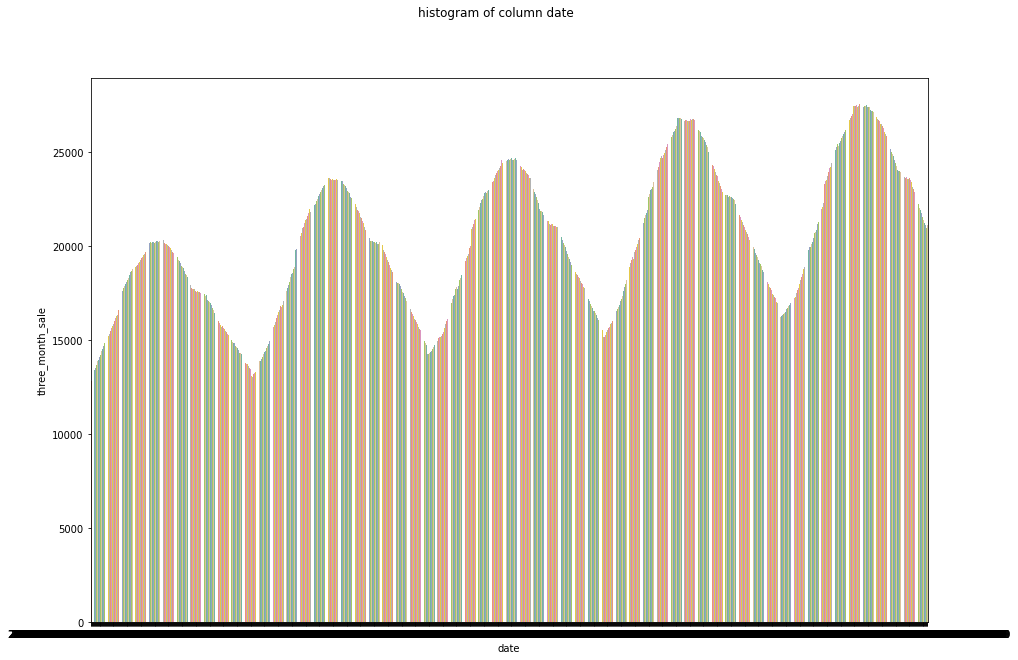

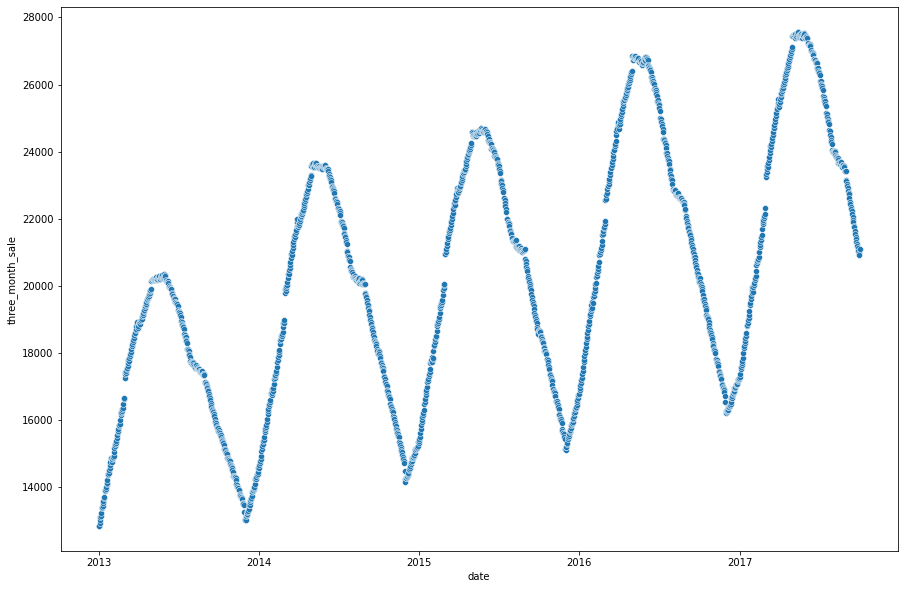

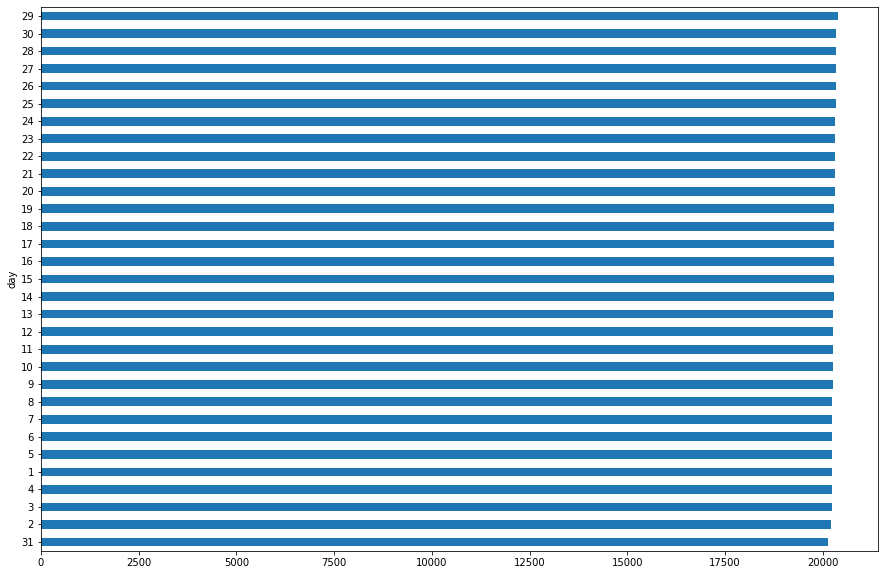

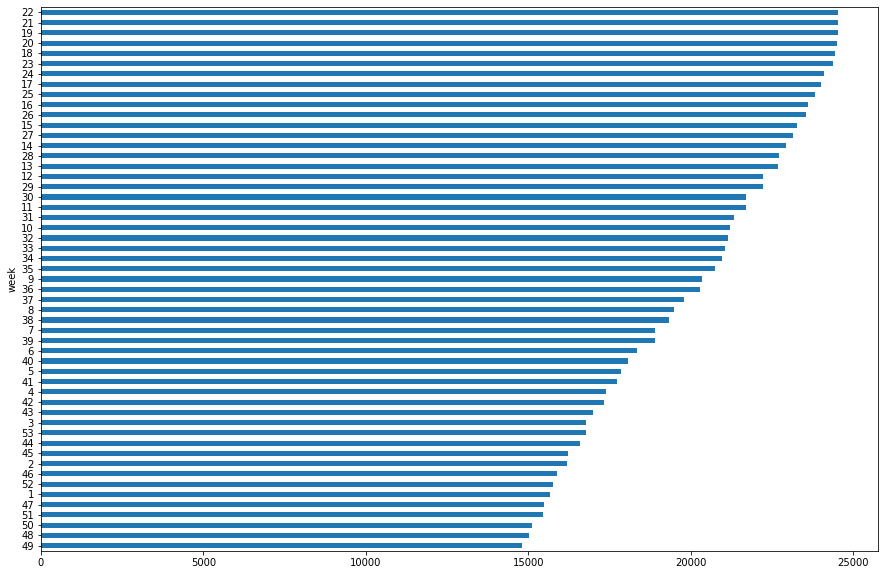

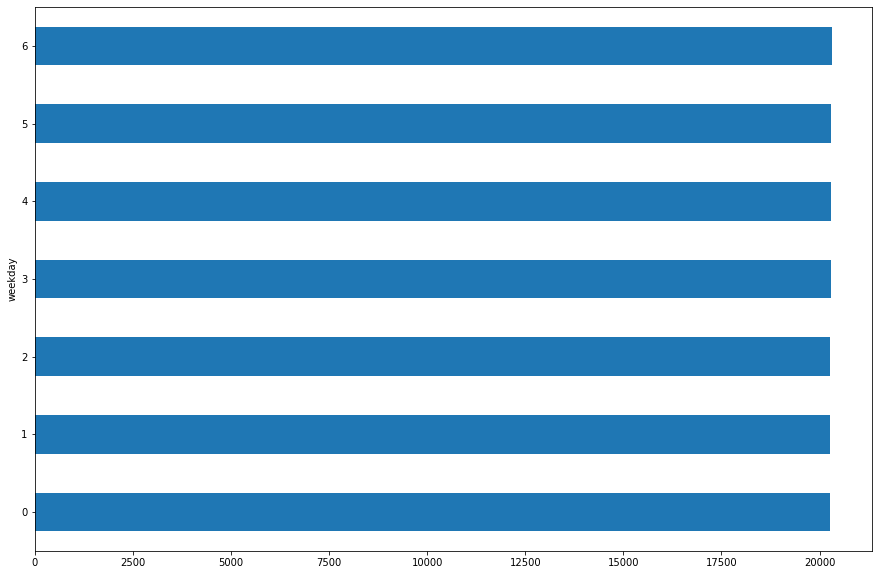

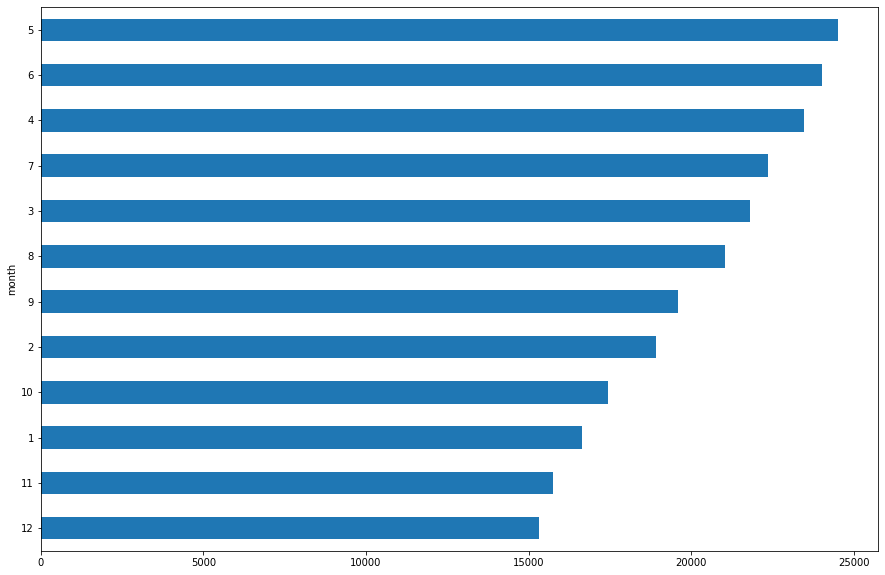

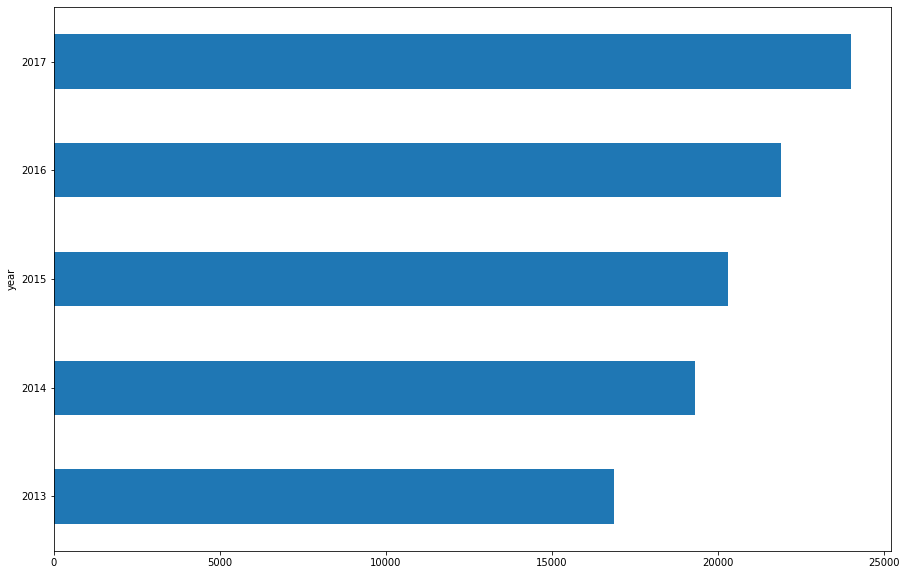

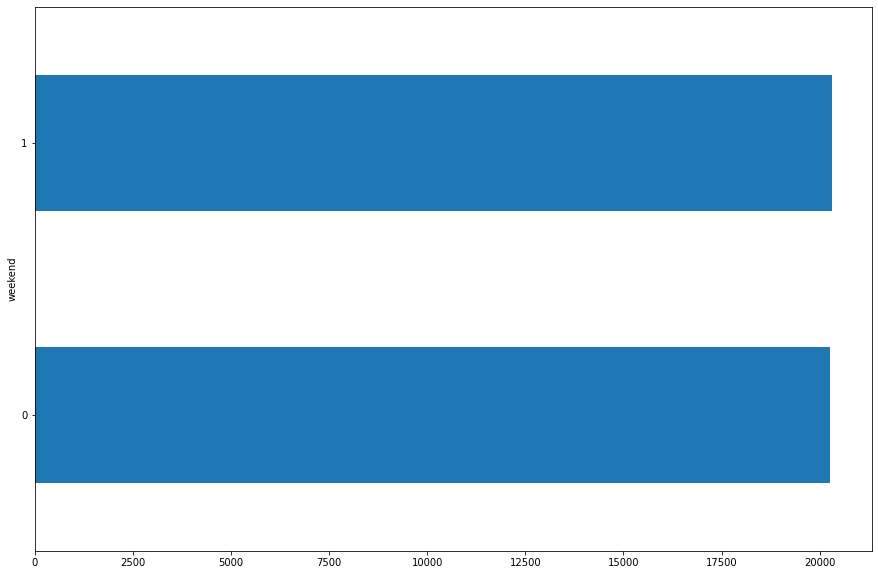

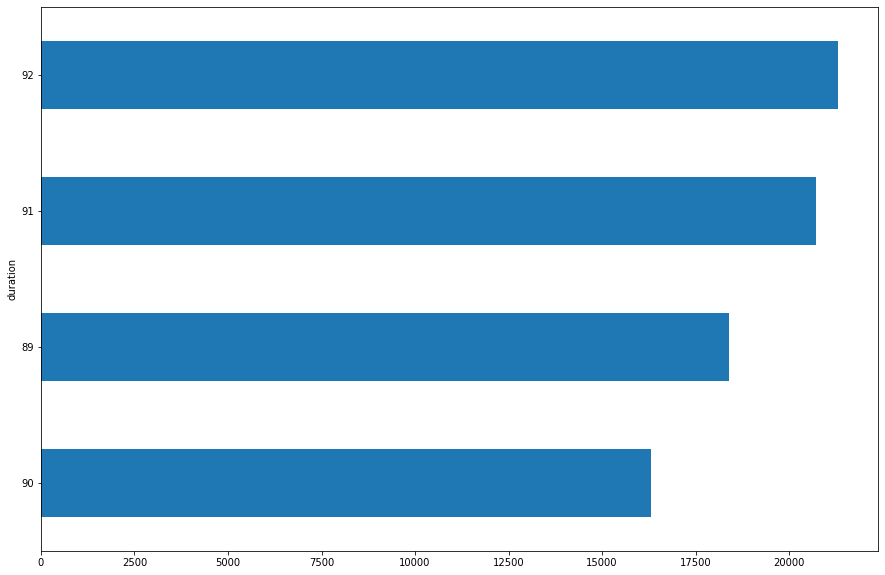

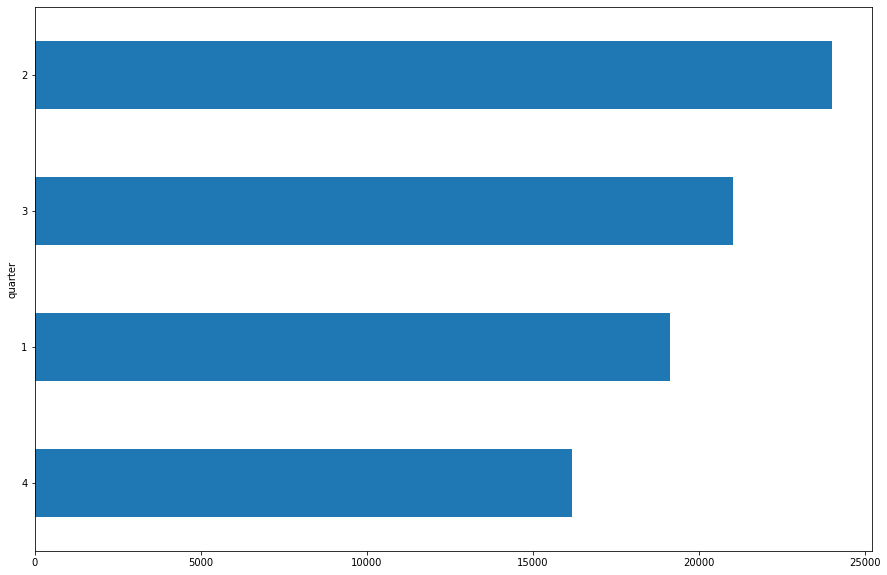

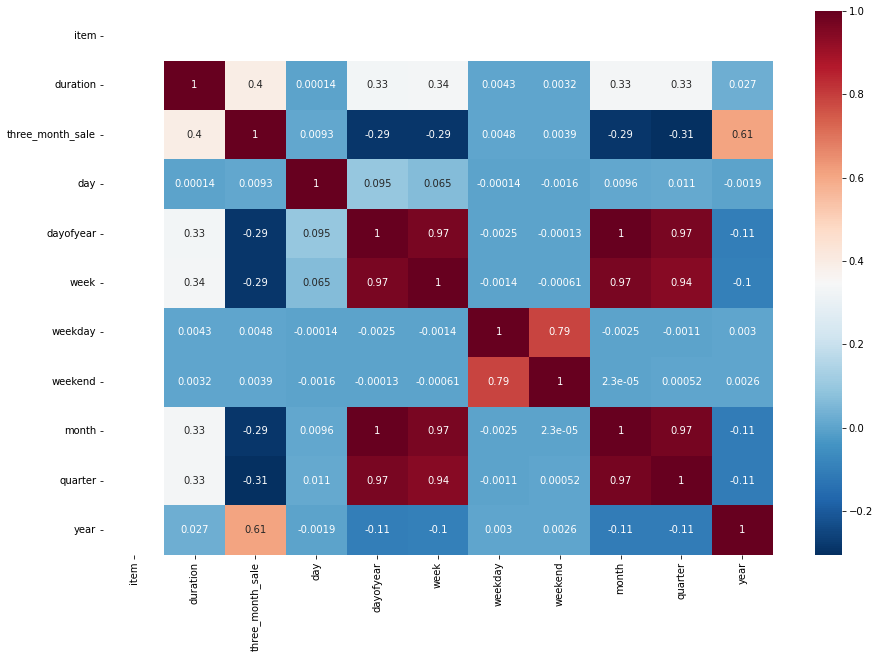

In [137]:
num_features=['date']
cat_features=['day','week','weekday','month','year','weekend','duration','quarter']
EDA(df,cat_features,num_features,'three_month_sale',1)

# **3. Splitting the data**

In [138]:
df=df.sort_values(by=['date','item'])

In [139]:
df

,date,item,duration,three_month_sale,day,dayofyear,week,weekday,weekend,month,quarter,year
0,2013-01-01,1,90,12847,1,1,1,1,0,1,1,2013
1735,2013-01-01,2,90,34650,1,1,1,1,0,1,1,2013
3470,2013-01-01,3,90,21420,1,1,1,1,0,1,1,2013
5205,2013-01-01,4,90,12884,1,1,1,1,0,1,1,2013
6940,2013-01-01,5,90,10630,1,1,1,1,0,1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
79809,2017-10-01,46,92,56785,1,274,39,6,1,10,4,2017
81544,2017-10-01,47,92,21132,1,274,39,6,1,10,4,2017
83279,2017-10-01,48,92,49695,1,274,39,6,1,10,4,2017
85014,2017-10-01,49,92,27934,1,274,39,6,1,10,4,2017


In [140]:
#unwanted_col=['day','week','weekday','weekend']                    
#df=delete(df,unwanted_col)                # One day sales ware converted into three month sales both of them gives same informations.
#df

In [207]:
split_date=pd.to_datetime('24-07-2016')
X_train=df[df['date']<split_date].drop(['three_month_sale','date','weekend'],axis=1).values
X_test=df[df['date']>=split_date].drop(['three_month_sale','date','weekend'],axis=1).values
y_train=df[df['date']<split_date].drop(['dayofyear','month','year','item','date','duration','day','week','weekday','weekend','quarter'],axis=1).values
y_test=df[df['date']>=split_date].drop(['dayofyear','month','year','item','date','duration','day','week','weekday','weekend','quarter'],axis=1).values

In [208]:
split_date

Timestamp('2016-07-24 00:00:00')

In [209]:
y_train=y_train.flatten()
y_test=y_test.flatten()

# **4. Scaling the data**

In [210]:
def scaling(train,test):                               # scaling the data for important for KNN,voting regressor 
  from sklearn.preprocessing import StandardScaler
  scaler=StandardScaler()
  #for ix,i in enumerate(features):
  scaler=scaler.fit(train)
  X_train_scale=scaler.transform(train)
  X_test_scale=scaler.transform(test)
  return X_train_scale,X_test_scale

In [211]:
X_test

array([[   1,   92,   24, ...,    7,    3, 2016],
       [   2,   92,   24, ...,    7,    3, 2016],
       [   3,   92,   24, ...,    7,    3, 2016],
       ...,
       [  48,   92,    1, ...,   10,    4, 2017],
       [  49,   92,    1, ...,   10,    4, 2017],
       [  50,   92,    1, ...,   10,    4, 2017]])

In [206]:
y_test

,three_month_sale
1300,23645
3035,63295
4770,39317
6505,23722
8240,19776
...,...
79809,56785
81544,21132
83279,49695
85014,27934


In [205]:
X_train_scale,X_test_scale=scaling(X_train,X_test)
print(X_train_scale.shape,X_test_scale.shape)

(65000, 9) (21750, 9)


# **5. Build the model**

In [148]:
from sklearn.linear_model import LinearRegression   # for linear regression
from sklearn.neighbors import KNeighborsRegressor   # for KNN regression
from sklearn.tree import DecisionTreeRegressor      # for Decision tree regression
from sklearn.ensemble import RandomForestRegressor  # for Random Forest regression
import xgboost 
from xgboost import XGBRegressor                    # for XGBoost regression
from sklearn.ensemble import VotingRegressor        # for voting regressoin

In [149]:
def algorithm (model,X_train, X_test, y_train, y_test,k):    # definition of model building for all models
  from sklearn.model_selection import cross_val_score
  from sklearn.metrics import mean_squared_error,mean_absolute_error
  mod=model
  mod.fit(X_train.values, y_train)                                  # fit the training set into the model
  y_predict_mod=mod.predict(X_test)                          # predict the result testing set
  result= pd.DataFrame({'actual': y_test, 'predict': y_predict_mod}) # dataframe of actual and predicted
  score=mod.score(X_test,y_test)                             # score of prediction
  MAE=mean_absolute_error(y_test,y_predict_mod)              # squared error of prediction
  print('for ' ,k ,' value ',"Train Accuracy : ",round(mod.score(X_train,y_train),3),"Val Accuracy :" ,round(np.mean(cross_val_score_time(mod, X_train, y_train)),3))
  return y_predict_mod,result,score,mod,MAE

In [150]:
def cross_val_score_time(mod,X_train,y_train):
  from sklearn.model_selection import TimeSeriesSplit
  from sklearn.metrics import r2_score
  tscv = TimeSeriesSplit(n_splits=3)
  scores=[]
  for i in tscv.split(X_train):
    X_tr,X_te=pd.DataFrame(list(map(X_train.__getitem__,i[0]))),pd.DataFrame(list(map(X_train.__getitem__,i[1])))
    y_tr,y_te=pd.Series(list(map(y_train.__getitem__,i[0]))),pd.Series(list(map(y_train.__getitem__,i[1])))
    X_tr=X_tr.values
    X_te=X_te.values
    y_tr=y_tr.values
    y_te=y_te.values
    #print(X_tr.shape)
    #print(X_te.shape)
    mod.fit(X_tr,y_tr)
    pred=mod.predict(X_te)
    sco=r2_score(y_te,pred)
    scores.append(sco)
  return scores

# **i) Linear Regression algorithm**

In [151]:
y_predict_lr,result_L,score_L,lin,MAE_L=algorithm(LinearRegression(),X_train_scale, X_test_scale, y_train, y_test,1)
print(result_L.head())
print('MAE error of linear regeression is ' ,MAE_L)
print(' Score of LinearRegression algorithmn is ', score_L * 100)

for  1  value  Train Accuracy :  0.114 Val Accuracy : -14.653
   actual       predict
0   23645  55923.062380
1   63295  55823.575753
2   39317  55724.089125
3   23722  55624.602498
4   19776  55525.115871
MAE error of linear regeression is  19281.599929535256
 Score of LinearRegression algorithmn is  7.618898727373324


# **ii) KNN regression model**

In [152]:
for i in range (1,10):
  algorithm(KNeighborsRegressor(i),X_train_scale, X_test_scale, y_train, y_test,i)

for  1  value  Train Accuracy :  1.0 Val Accuracy : 0.941
for  2  value  Train Accuracy :  0.584 Val Accuracy : 0.486
for  3  value  Train Accuracy :  0.388 Val Accuracy : 0.327
for  4  value  Train Accuracy :  0.261 Val Accuracy : 0.239
for  5  value  Train Accuracy :  0.271 Val Accuracy : 0.211
for  6  value  Train Accuracy :  0.331 Val Accuracy : 0.267
for  7  value  Train Accuracy :  0.339 Val Accuracy : 0.278
for  8  value  Train Accuracy :  0.301 Val Accuracy : 0.249
for  9  value  Train Accuracy :  0.315 Val Accuracy : 0.255


In [153]:
y_predict_knn,result_K,score_K,knn,MAE_K=algorithm(KNeighborsRegressor(1),X_train_scale, X_test_scale, y_train, y_test,1)
print(result_K.tail())
print('MAE error of knn regeression is ' , MAE_K)
print(' Score of KNN Regression algorithmn is ', score_K * 100)

for  1  value  Train Accuracy :  1.0 Val Accuracy : 0.941
       actual  predict
21745   56785  49553.0
21746   21132  18621.0
21747   49695  43335.0
21748   27934  24987.0
21749   62925  56095.0
MAE error of knn regeression is  2727.0490114942527
 Score of KNN Regression algorithmn is  98.02764909649837


# **iii)Decision Tree Regression model**

In [154]:
for i in range(1,25):
  algorithm(DecisionTreeRegressor(max_depth=i,random_state=97),X_train, X_test, y_train, y_test,i)

for  1  value  Train Accuracy :  0.086 Val Accuracy : 0.034
for  2  value  Train Accuracy :  0.196 Val Accuracy : 0.145
for  3  value  Train Accuracy :  0.267 Val Accuracy : 0.212
for  4  value  Train Accuracy :  0.326 Val Accuracy : 0.282
for  5  value  Train Accuracy :  0.391 Val Accuracy : 0.351
for  6  value  Train Accuracy :  0.463 Val Accuracy : 0.435
for  7  value  Train Accuracy :  0.541 Val Accuracy : 0.507
for  8  value  Train Accuracy :  0.611 Val Accuracy : 0.573
for  9  value  Train Accuracy :  0.674 Val Accuracy : 0.638
for  10  value  Train Accuracy :  0.727 Val Accuracy : 0.68
for  11  value  Train Accuracy :  0.765 Val Accuracy : 0.711
for  12  value  Train Accuracy :  0.794 Val Accuracy : 0.752
for  13  value  Train Accuracy :  0.829 Val Accuracy : 0.78
for  14  value  Train Accuracy :  0.853 Val Accuracy : 0.829
for  15  value  Train Accuracy :  0.899 Val Accuracy : 0.879
for  16  value  Train Accuracy :  0.947 Val Accuracy : 0.902
for  17  value  Train Accuracy :  0

In [155]:
y_predict_dt,result_D,score_D,dt,MAE_D=algorithm(DecisionTreeRegressor(max_depth=24,random_state=97),X_train_scale, X_test_scale, y_train, y_test,24)
print(result_D.head())
print('MAE error of Decision Tree regeression is ' , MAE_D)
print(' Score of Decision Tree Regression algorithmn is ', score_D * 100)

for  24  value  Train Accuracy :  1.0 Val Accuracy : 0.944
   actual  predict
0   23645  23733.0
1   63295  63471.0
2   39317  39405.0
3   23722  23810.0
4   19776  19836.0
MAE error of Decision Tree regeression is  2601.1654774655003
 Score of Decision Tree Regression algorithmn is  98.12067947126411


# **iv) Random Forest Regression model**

In [156]:
for i in [10,20,30,40,50,60,70,80,90,100]:
  algorithm(RandomForestRegressor(max_depth=5,n_estimators=i,random_state=97,max_features='sqrt'),X_train_scale, X_test_scale, y_train, y_test,i)

for  10  value  Train Accuracy :  0.339 Val Accuracy : 0.267
for  20  value  Train Accuracy :  0.339 Val Accuracy : 0.272
for  30  value  Train Accuracy :  0.339 Val Accuracy : 0.271
for  40  value  Train Accuracy :  0.336 Val Accuracy : 0.268
for  50  value  Train Accuracy :  0.338 Val Accuracy : 0.272
for  60  value  Train Accuracy :  0.336 Val Accuracy : 0.27
for  70  value  Train Accuracy :  0.338 Val Accuracy : 0.268
for  80  value  Train Accuracy :  0.337 Val Accuracy : 0.267
for  90  value  Train Accuracy :  0.338 Val Accuracy : 0.266
for  100  value  Train Accuracy :  0.337 Val Accuracy : 0.268


In [157]:
y_predict_rfr,result_R,score_R,rfr,MAE_R=algorithm(RandomForestRegressor(max_depth=5,n_estimators=40,random_state=97,max_features='sqrt'),X_train_scale, X_test_scale, y_train, y_test,40)
print(result_R)
print('MAE error of Random forest regeression is ' , MAE_R)
print(' Score of random forest regresssion is ', score_R * 100)

for  40  value  Train Accuracy :  0.336 Val Accuracy : 0.268
       actual       predict
0       23645  36137.633977
1       63295  39908.133336
2       39317  39908.133336
3       23722  28679.052092
4       19776  28119.213660
...       ...           ...
21745   56785  42295.411299
21746   21132  42295.411299
21747   49695  42295.411299
21748   27934  42295.411299
21749   62925  42295.411299

[21750 rows x 2 columns]
MAE error of Random forest regeression is  16552.531167434907
 Score of random forest regresssion is  25.493084885455985


# **v)Xgboost Regression model**

In [158]:
for i in np.arange(0.1,1.1,0.1):
  algorithm(XGBRegressor(learning_rate=i,n_estimators= 200,random_state=97,objective='reg:squarederror'),X_train_scale, X_test_scale, y_train, y_test,i)

for  0.1  value  Train Accuracy :  0.96 Val Accuracy : 0.894
for  0.2  value  Train Accuracy :  0.983 Val Accuracy : 0.933
for  0.30000000000000004  value  Train Accuracy :  0.991 Val Accuracy : 0.939
for  0.4  value  Train Accuracy :  0.993 Val Accuracy : 0.944
for  0.5  value  Train Accuracy :  0.994 Val Accuracy : 0.946
for  0.6  value  Train Accuracy :  0.995 Val Accuracy : 0.945
for  0.7000000000000001  value  Train Accuracy :  0.996 Val Accuracy : 0.944
for  0.8  value  Train Accuracy :  0.996 Val Accuracy : 0.945
for  0.9  value  Train Accuracy :  0.996 Val Accuracy : 0.942
for  1.0  value  Train Accuracy :  0.997 Val Accuracy : 0.938


In [159]:
for i in np.arange(0.45,0.55,0.01):
  algorithm(XGBRegressor(learning_rate=i,n_estimators= 500,random_state=97,objective='reg:squarederror'),X_train_scale, X_test_scale, y_train, y_test,i)

for  0.45  value  Train Accuracy :  0.998 Val Accuracy : 0.951
for  0.46  value  Train Accuracy :  0.999 Val Accuracy : 0.951
for  0.47000000000000003  value  Train Accuracy :  0.998 Val Accuracy : 0.952
for  0.48000000000000004  value  Train Accuracy :  0.998 Val Accuracy : 0.951
for  0.49000000000000005  value  Train Accuracy :  0.999 Val Accuracy : 0.951
for  0.5  value  Train Accuracy :  0.998 Val Accuracy : 0.951
for  0.51  value  Train Accuracy :  0.998 Val Accuracy : 0.951
for  0.52  value  Train Accuracy :  0.999 Val Accuracy : 0.95
for  0.53  value  Train Accuracy :  0.999 Val Accuracy : 0.949
for  0.54  value  Train Accuracy :  0.999 Val Accuracy : 0.948
for  0.55  value  Train Accuracy :  0.999 Val Accuracy : 0.948


In [160]:
y_predict_Xgb,result_X,score_X,Xgb,MAE_X=algorithm(XGBRegressor(learning_rate=0.5,n_estimators= 200,random_state=97,objective='reg:squarederror'),X_train_scale, X_test_scale, y_train, y_test,0.5)
print(result_X)
print('MAE error of XGBoost regeression is ' , MAE_X)
print(' Score of Xgboost regression is ', score_X * 100)

for  0.5  value  Train Accuracy :  0.994 Val Accuracy : 0.946
       actual       predict
0       23645  24266.744141
1       63295  63651.898438
2       39317  39776.109375
3       23722  25507.609375
4       19776  20838.941406
...       ...           ...
21745   56785  56727.714844
21746   21132  20771.978516
21747   49695  49757.761719
21748   27934  28144.626953
21749   62925  62908.332031

[21750 rows x 2 columns]
MAE error of XGBoost regeression is  2500.459742726293
 Score of Xgboost regression is  98.07041234757558


# **vi)Voting Regressor algorithm**

In [161]:
y_predict_vot,result_V,score_V,vot,MAE_V=algorithm(VotingRegressor(estimators= [('KNN',knn),('DT',dt),('XGB',Xgb)]),X_train_scale, X_test_scale, y_train, y_test,'4 models')
print(result_V)
print('MAE error of voting regeression is ' , MAE_V)
print(' Score of Voting regression algorithmn is ', score_V * 100)

for  4 models  value  Train Accuracy :  0.999 Val Accuracy : 0.949
       actual       predict
0       23645  23910.914714
1       63295  63531.299479
2       39317  39528.703125
3       23722  24375.869792
4       19776  20170.313802
...       ...           ...
21745   56785  52000.571615
21746   21132  19395.992839
21747   49695  45530.587240
21748   27934  26109.875651
21749   62925  58442.444010

[21750 rows x 2 columns]
MAE error of voting regeression is  1725.5632966329317
 Score of Voting regression algorithmn is  99.09825234175315


# **6.  Evaluation metrics**

In [162]:
from sklearn.metrics import r2_score          # R2 score  is suitable for regression problem for evaluavating the model

In [163]:
def evaluate(mod,X_test,y_test,predict,result):
  R2_score=r2_score(y_test,predict)
  plt.figure(figsize=(20,10))
  sns.jointplot(x=y_test,y=predict,data=result,kind='reg')   # plottig the graph between actual and predicted
  plt.show()
  print('R2 score of ',mod,' : ', R2_score) 

# **i) Evaluation metric for logistic regression algorithm**

<Figure size 1440x720 with 0 Axes>

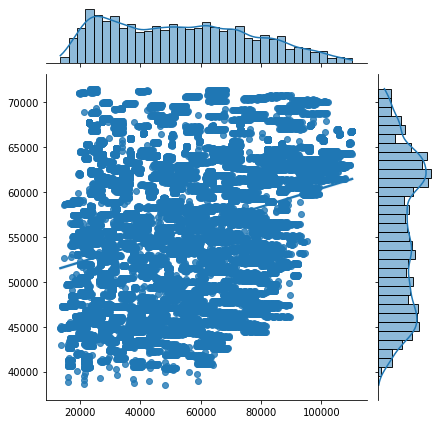

R2 score of  LinearRegression()  :  0.07618898727373324


In [164]:
evaluate(lin,X_test_scale,y_test,y_predict_lr,result_L)

# **ii) Evaluation metric for KNN classifier algorithm**

<Figure size 1440x720 with 0 Axes>

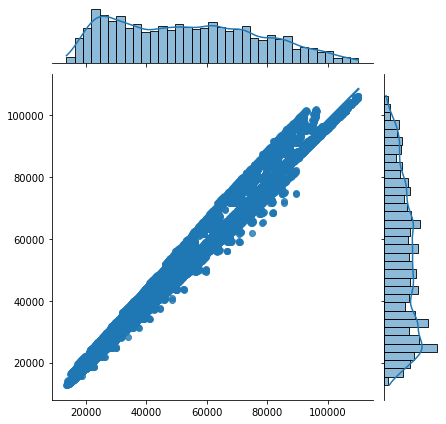

R2 score of  KNeighborsRegressor(n_neighbors=1)  :  0.9802764909649836


In [165]:
evaluate(knn,X_test_scale,y_test,y_predict_knn,result_K)

# **iii) Evaluation metric for Decision Tree classifier algorithm**

<Figure size 1440x720 with 0 Axes>

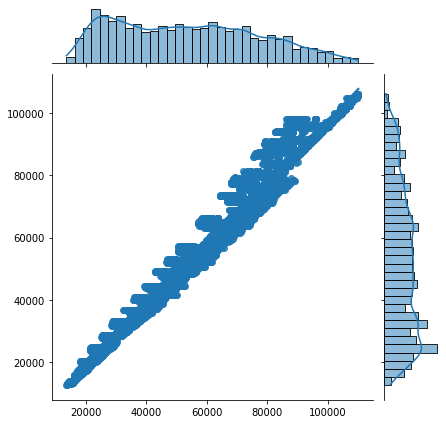

R2 score of  DecisionTreeRegressor(max_depth=24, random_state=97)  :  0.981206794712641


In [166]:
evaluate(dt,X_test_scale,y_test,y_predict_dt,result_D)

In [167]:
from sklearn import tree

In [168]:
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30,30), dpi=400)
#tree.plot_tree(dt,filled = True);
#fig.savefig('imagename2.png')

# **iv)Evaluation metric for RandomForest classifier**

<Figure size 1440x720 with 0 Axes>

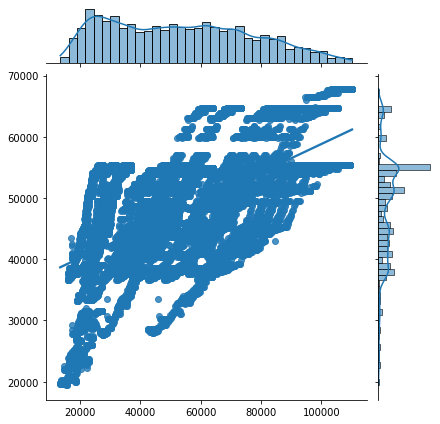

R2 score of  RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=40,
                      random_state=97)  :  0.25493084885455985


In [169]:
evaluate(rfr,X_test_scale,y_test,y_predict_rfr,result_R)

# **v)Evaluation metric for Xgboost classifier**

<Figure size 1440x720 with 0 Axes>

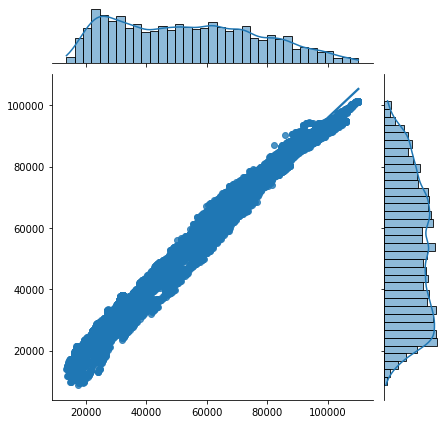

R2 score of  XGBRegressor(learning_rate=0.5, n_estimators=200, objective='reg:squarederror',
             random_state=97)  :  0.9807041234757559


In [170]:
evaluate(Xgb,X_test_scale,y_test,y_predict_Xgb,result_X)

# **vi) evaluation metric for Voting classifier**

<Figure size 1440x720 with 0 Axes>

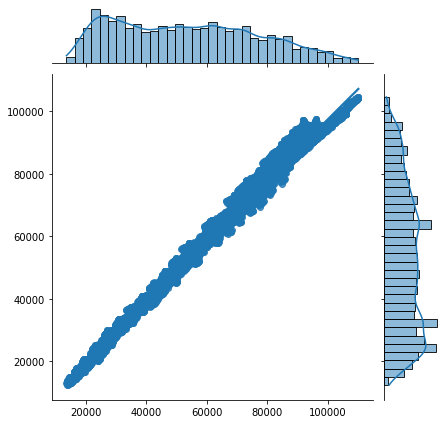

R2 score of  VotingRegressor(estimators=[('KNN', KNeighborsRegressor(n_neighbors=1)),
                            ('DT',
                             DecisionTreeRegressor(max_depth=24,
                                                   random_state=97)),
                            ('XGB',
                             XGBRegressor(learning_rate=0.5, n_estimators=200,
                                          objective='reg:squarederror',
                                          random_state=97))])  :  0.9909825234175316


In [171]:
evaluate(vot,X_test_scale,y_test,y_predict_vot,result_V)


# **SCORING COMPARISON**

In [172]:
score=[score_L,score_K,score_D,score_R,score_X,score_V]
model=['Linear regression','KNN regression','Decision tree regression','RandomForest regression','XGboost regression','voting regression']
RESULT= pd.DataFrame({'model': model, 'score': score})
RESULT

,model,score
0,Linear regression,0.076189
1,KNN regression,0.980276
2,Decision tree regression,0.981207
3,RandomForest regression,0.254931
4,XGboost regression,0.980704
5,voting regression,0.990983


# **Model Deploying**

In [175]:
y_predict_Xgb,result_X,score_X,Xgb,MAE_X=algorithm(XGBRegressor(learning_rate=0.47,n_estimators= 500,random_state=97,objective='reg:squarederror'),X_train, X_test, y_train, y_test,0.47)

for  0.47  value  Train Accuracy :  0.998 Val Accuracy : 0.952


In [179]:
pickle.dump(Xgb,open('best_Xgb_model.pkl','wb'))

In [216]:
model=pickle.load(open('best_Xgb_model.pkl','rb'))
model.predict([[1,92,24,206,29,6,7,3,2016]])

array([21588.521], dtype=float32)

In [181]:
!pip install streamlit
!pip install writefile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [227]:
%%writefile app_idf.py

import numpy as np
import pickle
import pandas as pd
import streamlit as st
import datetime

model=pickle.load(open('best_Xgb_model.pkl','rb'))

def deploy():
  st.set_page_config(layout='wide')
  
  st.title('ITEM DEMAND FORECASTING')
  st.header('Enter the item Details')
  date=st.date_input('which date you want to Forecast :')
  item=st.number_input('which item you want to forecast:' , min_value=1,max_value=50)

  if st.button('Demand Forecast'):
    forecast=predict(date,item)
    forecast=np.round_(forecast,0)
    st.success(f'Demand of {item} Item at after 3 Months is : {forecast[0]}')

  
def predict(date,item):
  date=pd.to_datetime(date)
  dayofyear=date.dayofyear
  day=date.day
  week=date.week
  dayofweek=date.dayofweek
  quarter=date.quarter
  month=date.month
  year=date.year
  duration=(pd.to_datetime(date+pd.DateOffset(months=+3))-pd.to_datetime(date)).days
  prediction=model.predict([[item,duration,day,dayofyear,week,dayofweek,month,quarter,year]])
    
  return prediction
  

if __name__=='__main__':
  deploy()

Overwriting app_idf.py


In [228]:
!streamlit run app_idf.py & npx localtunnel --port 8501

npx: installed 22 in 4.053s



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.70.153.24:8501

your url is: https://mighty-moments-count-34-70-153-24.loca.lt
  Stopping...
^C
